# Correlación

Para buscar la relación entre dos variables.

<img src="img/correlacion_1.jpg" width="600">

<img src="img/correlacion_2.jpg" width="600">

* Si la correlación es **positiva** su relación será proporcional, si una aumenta la otra también lo hace y viceversa.
* Si la correlación es **negativa**, ambas variables serán inversamente proporcionales, si una crece, la otra decrece y viceversa.

Hay que tener en cuenta que aunque dos variables estén correlacionadas no implica que una sea la causa de la otra, puede haber más variables involucradas en el proceso, o directamente la correlación puede deberse a la casualidad.

In [1]:
import pandas as pd

In [2]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [3]:
data_ads.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [4]:
len(data_ads)

200

In [5]:
import numpy as np

# 1- Determinación de la correlación de forma manual.

Aplicamos para determinar manualmente(sin usar corr() ) la correlación de ventas en TV frente a las ventas, usando el coeficiente de correlación de Pearson:

$$\displaystyle \text{Coef. de correlación de Pearson} (r) = \frac{cov(x,y)} {s_xs_y} =\frac{\sum(x_i-\bar{x})(yi-\bar{y})} {(N-1)s_xs_y}\\
$$


### 1.1- Calculamos primero el numerador de la correlación de Pearsons.

In [25]:
#Añadimos una columna para la correlación:

data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"]))* (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [7]:
data_ads.head()

TV  Radio  Newspaper  Sales       corrn
0  230.1   37.8       69.2   22.1  670.896956
1   44.5   39.3       45.1   10.4  371.460206
2   17.2   45.9       69.3    9.3  613.181206
3  151.5   41.3       58.5   18.5   19.958456
4  180.8   10.8       58.4   12.9  -37.892794

### 1.2- Calculamos el denominador de la correlación de Pearson para las x (en nuestro caso la TV):

In [8]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"]))**2

In [9]:
data_ads.head()

TV  Radio  Newspaper  Sales       corrn         corr1
0  230.1   37.8       69.2   22.1  670.896956   6898.548306
1   44.5   39.3       45.1   10.4  371.460206  10514.964306
2   17.2   45.9       69.3    9.3  613.181206  16859.074806
3  151.5   41.3       58.5   18.5   19.958456     19.869306
4  180.8   10.8       58.4   12.9  -37.892794   1139.568806

### 1.3- Calculamos el denominador de la correlación de Pearson para las y (en nuestro caso las ventas):

In [10]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [11]:
data_ads.head()

TV  Radio  Newspaper  Sales       corrn         corr1      corr2
0  230.1   37.8       69.2   22.1  670.896956   6898.548306  65.246006
1   44.5   39.3       45.1   10.4  371.460206  10514.964306  13.122506
2   17.2   45.9       69.3    9.3  613.181206  16859.074806  22.302006
3  151.5   41.3       58.5   18.5   19.958456     19.869306  20.048006
4  180.8   10.8       58.4   12.9  -37.892794   1139.568806   1.260006

### 1.4- Calculamos finalmente la correlación de Pearson:

In [12]:
corrn = sum(data_ads["corrn"])/np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))

In [13]:
corrn

0.782224424861606

* Vemos que sale un valor positivo, por lo tanto cuanto mas se gasta en television también incrementan las ventas. En principio sería positivo aumentar el dinero invertido en la TV ya que aumentarían las ventas.

### 1.5- Automatizamos el calculo de la correlación de Pearson con una función:

In [14]:
def corr_coeff(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1]))* (df[var2] - np.mean(df[var2]))
    df["corr1"] = (df[var1] - np.mean(df[var1]))**2
    df["corr2"] = (df[var2] - np.mean(df[var2]))**2
    corr_p = sum(df["corrn"])/np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_p

In [15]:
corr_coeff(data_ads, "TV", "Sales")

0.782224424861606

**Ahora aplicamos esa correlación a todas las combinaciones del data set:**

In [16]:
# Sacamos el nombre de las columnas (sería conveniente volver a cargar el codigo pero sin los corrn, corr1 y corr2)
cols = data_ads.columns.values 
cols

array(['TV', 'Radio', 'Newspaper', 'Sales', 'corrn', 'corr1', 'corr2'],
      dtype=object)

In [17]:
for x in cols:
    for y in cols:
        print(x + ", "+ y + " : " + str(corr_coeff(data_ads, x, y)))

TV, TV : 1.0
TV, Radio : 0.05480866446583009
TV, Newspaper : 0.056647874965056993
TV, Sales : 0.782224424861606
TV, corrn : -0.0011216033233262073
TV, corr1 : -0.07879735036509569
TV, corr2 : -0.04435683271077501
Radio, TV : 0.05480866446583009
Radio, Radio : 1.0
Radio, Newspaper : 0.3541037507611752
Radio, Sales : 0.5762225745710553
Radio, corrn : 0.003367194224496663
Radio, corr1 : 0.1085768694522202
Radio, corr2 : 0.28933391270094067
Newspaper, TV : 0.056647874965056993
Newspaper, Radio : 0.3541037507611752
Newspaper, Newspaper : 1.0
Newspaper, Sales : 0.22829902637616525
Newspaper, corrn : 0.004654495262249754
Newspaper, corr1 : 0.5503385875778577
Newspaper, corr2 : 0.45100034081887913
Sales, TV : 0.782224424861606
Sales, Radio : 0.5762225745710553
Sales, Newspaper : 0.22829902637616525
Sales, Sales : 1.0
Sales, corrn : 0.03435823617756815
Sales, corr1 : 0.3226857579432848
Sales, corr2 : 0.3391108854965276
corrn, TV : 0.002251660616088983
corrn, Radio : 0.013091062391317217
corrn, 

**Vamos a verlo mejor usando una nube de puntos para observar la correlación:**

In [18]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gasto en TV vs Ventas del Producto')

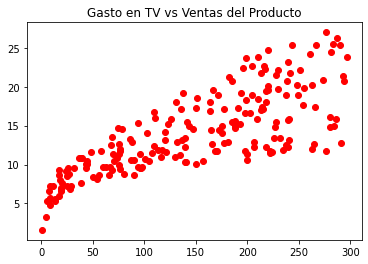

In [19]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del Producto')

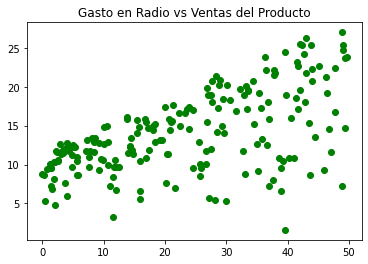

In [20]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del Producto")

Text(0.5, 1.0, 'Gasto en Periódico vs Ventas del Producto')

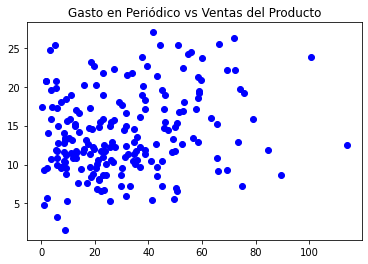

In [21]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Periódico vs Ventas del Producto")

# 2- Determinación de la correlación con python.

**Vemos que la correlación ya viene implementada en Python con la función corr()**

In [22]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

# Observamos la matriz de correlación
data_ads.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

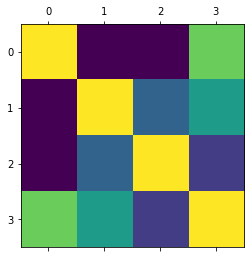

In [23]:
plt.matshow(data_ads.corr())